# Gene Expression Data Analysis of Colorectal Cancer Data

### Imports

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

from sklearn.utils import resample
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

### Data Preparation and Visualizations

In [80]:
# Load the dataset
file_path = './Data/CRC_Gene_Expression_Data.csv'
data = pd.read_csv(file_path)

# Set the first column as the index
data.set_index('Unnamed: 0', inplace=True)

# Correcting the code to rename 'Unnamed: 0' to 'Sample_ID'
data.index.names = ['Sample_ID']

data

,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,...,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
Sample_ID,,,,,,,,,,,,,,,,,,,,,
1,8589.4160,5468.2407,4263.4077,4064.9358,1997.8930,5282.3250,2169.7200,2773.4211,7526.3860,4607.6763,...,67.56125,259.91250,138.89874,88.23250,39.667860,67.82875,75.67750,83.52250,28.70125,Abnormal
2,9164.2540,6719.5293,4883.4487,3718.1590,2015.2214,5569.9070,3849.0588,2793.3875,7017.7340,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033330,152.19500,186.56750,44.47250,16.77375,Normal
3,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,2786.5820,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,Abnormal
4,6246.4487,7823.5340,5955.8350,3975.5642,2002.6132,2130.5430,1531.1425,1714.6312,3869.7850,4989.4070,...,41.68375,5.92500,183.00626,74.52875,67.710720,48.33875,42.52000,49.98250,16.08500,Normal
5,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,3109.4130,...,76.60375,161.35000,61.70125,54.56375,223.359530,73.09875,57.59875,7.48875,31.81250,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,4972.1660,4173.9180,3668.5337,1567.5554,1570.4406,3466.8108,2106.4988,1535.7574,1887.6212,3519.6000,...,6.44750,156.44500,93.95000,86.90875,95.442856,31.18750,57.15250,13.96000,10.54750,Abnormal
59,9112.3720,6824.4863,5982.8460,3147.0430,4847.3080,11222.6820,6333.4727,4299.5024,4644.4424,5888.5464,...,35.87875,342.65000,84.75125,60.27375,143.877380,8.99625,106.87875,23.20250,32.16625,Abnormal
60,6730.6250,3472.1250,2559.4624,2624.6892,1596.2179,4372.7890,3798.5261,1026.4775,3512.3337,3243.1690,...,119.96250,111.60375,166.75500,130.45500,124.253570,96.46500,133.52126,93.09875,7.43250,Normal


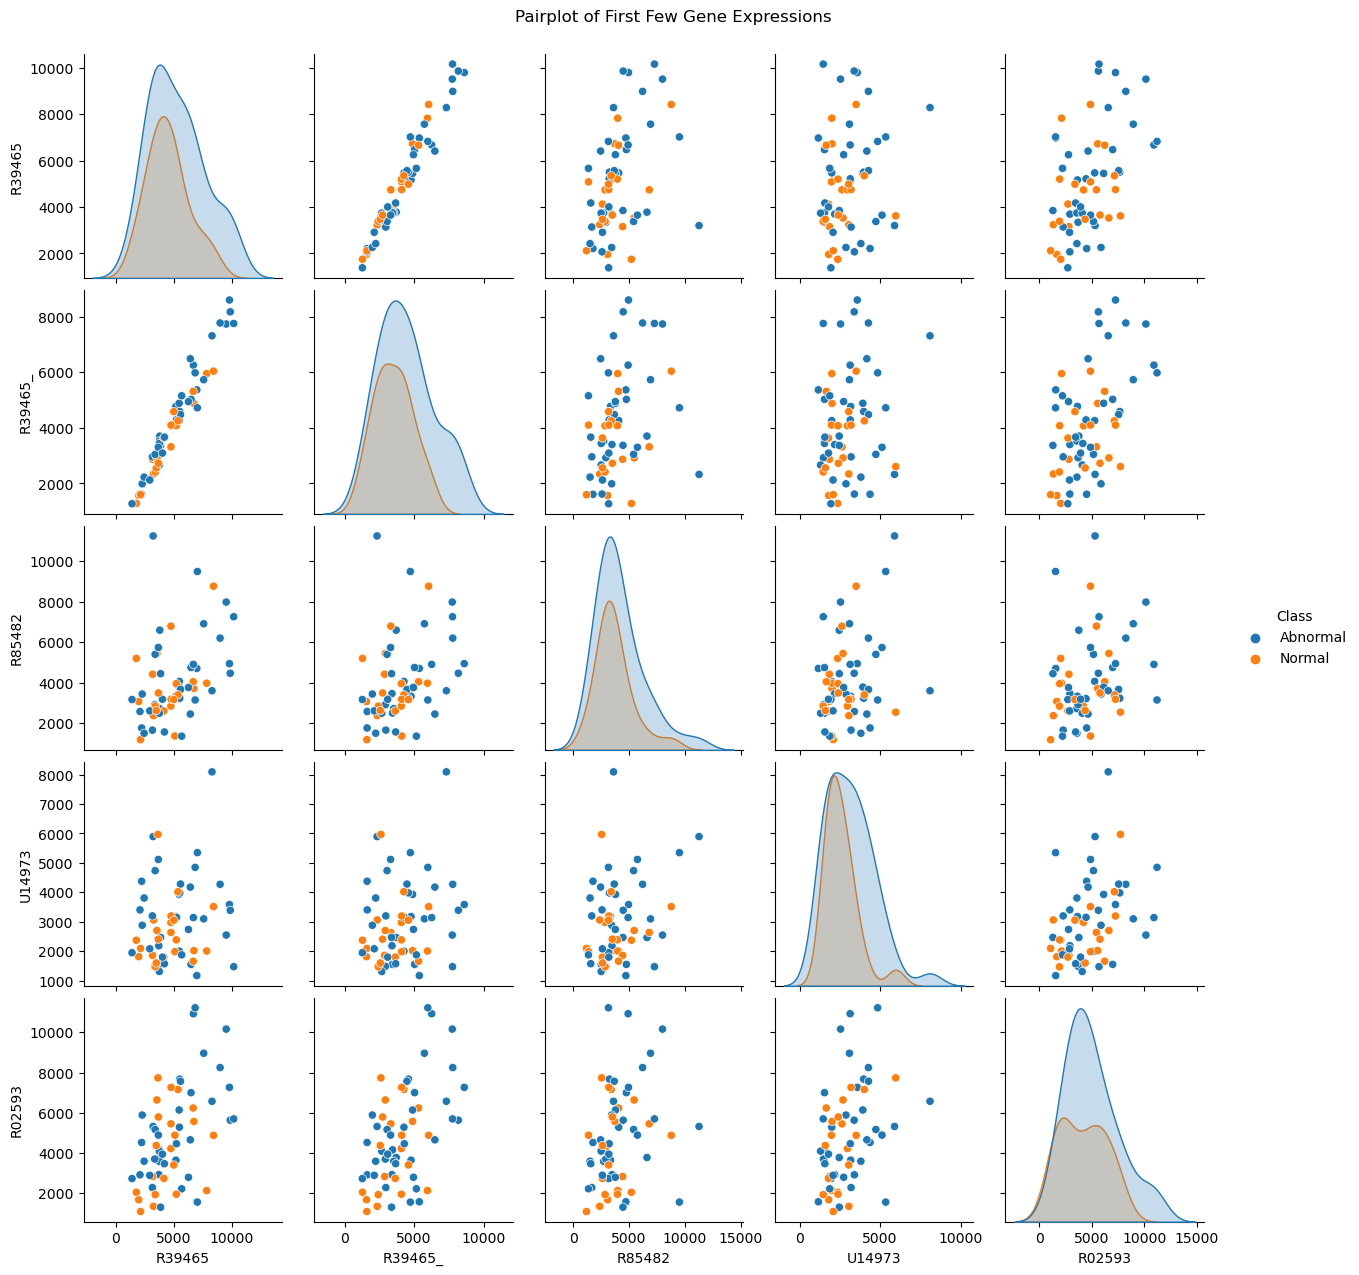

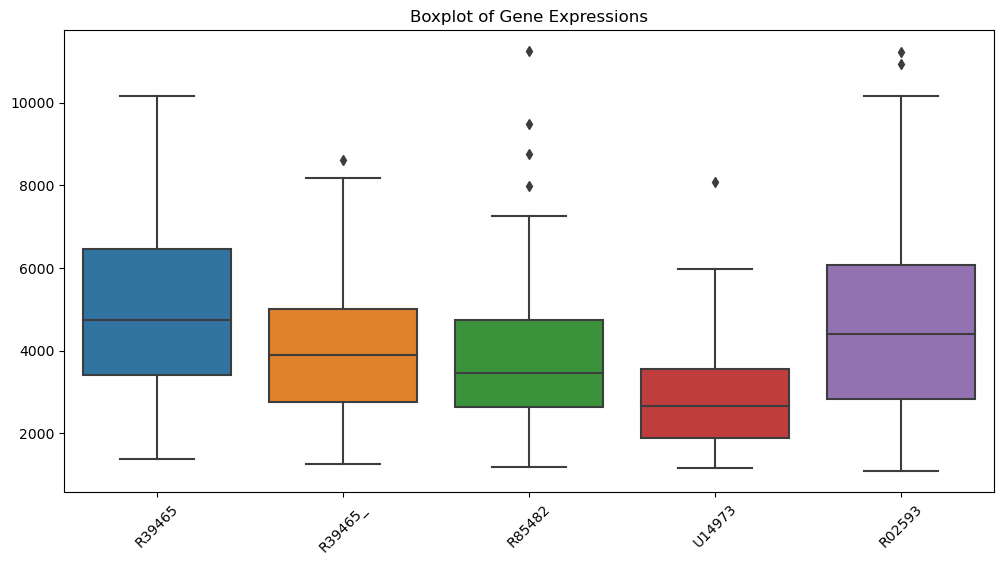

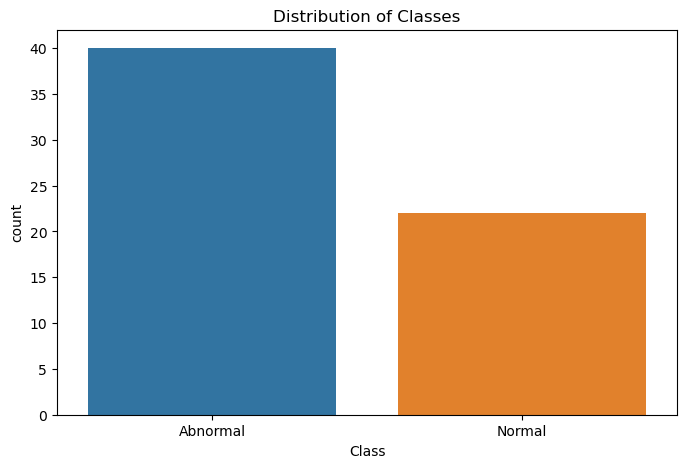

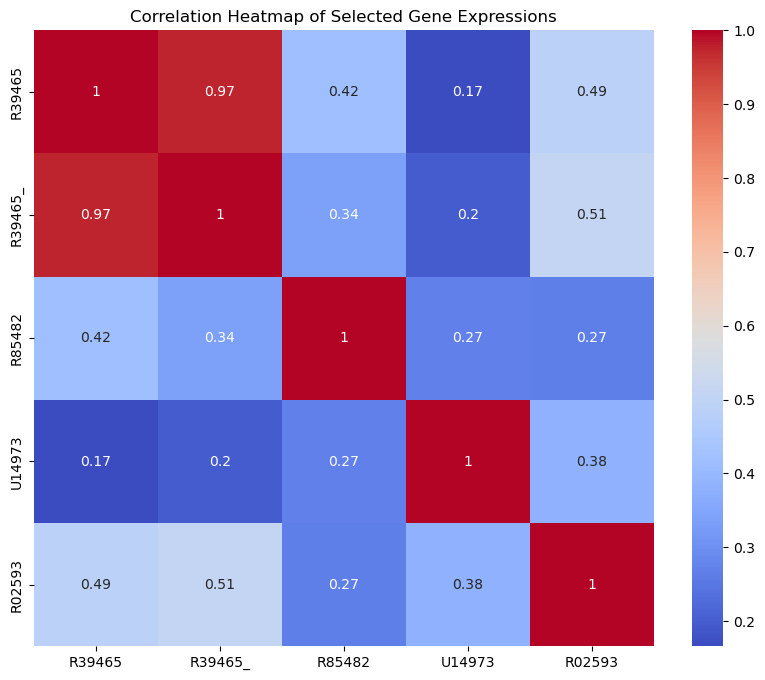

In [81]:

# Visualizing the first few gene expressions with a pairplot
selected_columns = data.columns[1:6]  # Selecting a few columns for visualization
pairplot_data = data[selected_columns].join(data['Class'])
sns.pairplot(pairplot_data, hue='Class')
plt.suptitle('Pairplot of First Few Gene Expressions', y=1.02)
plt.show()

# Boxplot for visualizing distributions of gene expressions
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[selected_columns])
plt.title('Boxplot of Gene Expressions')
plt.xticks(rotation=45)
plt.show()

# Countplot for the class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Classes')
plt.show()

# Correlation heatmap
corr = data[selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Gene Expressions')
plt.show()

### Models

#### Decision Tree

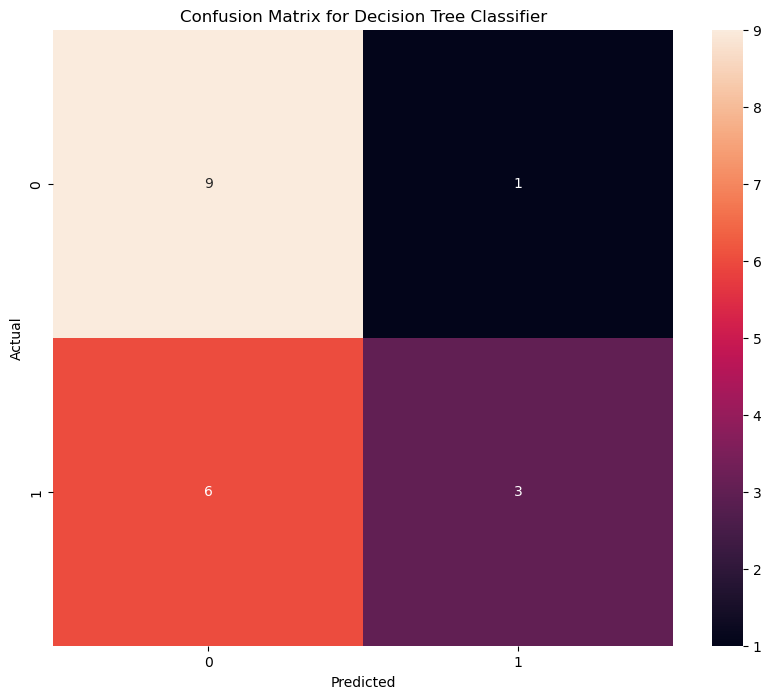

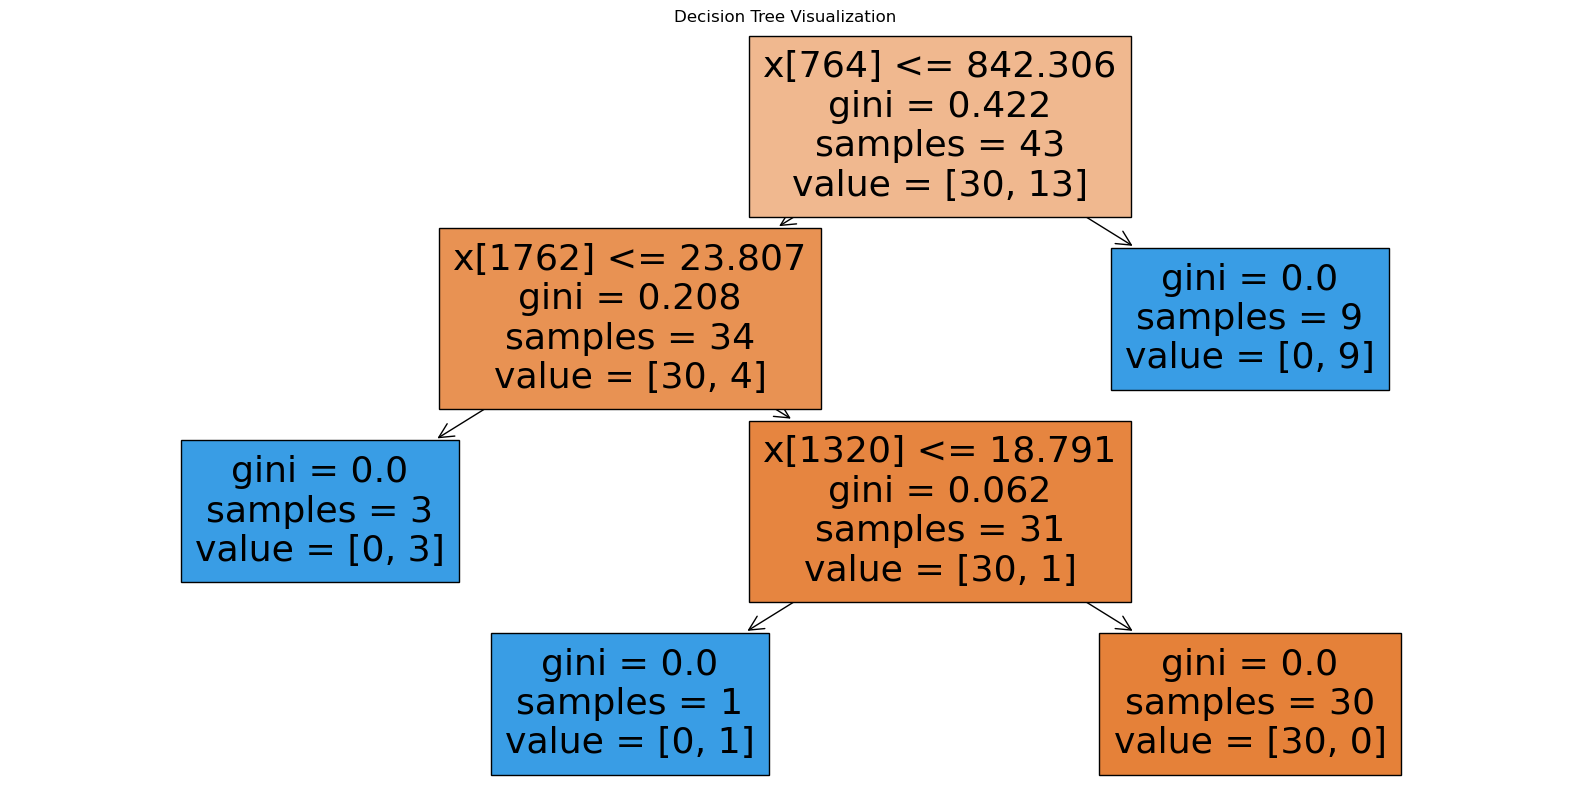

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       0.75      0.33      0.46         9

    accuracy                           0.63        19
   macro avg       0.68      0.62      0.59        19
weighted avg       0.67      0.63      0.60        19



In [82]:
# Preparing the data
X = data.drop(['Class'], axis=1)
y = data['Class']

# Encoding the 'Class' column
y = y.map({'Abnormal': 0, 'Normal': 1})

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and training the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = dt_classifier.predict(X_test)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 8))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, filled=True)
plt.title('Decision Tree Visualization')
plt.show()

# Printing classification report
print("Classification Report:\n", classification_report(y_test, y_pred))



#### Neural Network

In [102]:
# We will perform data augmentation by bootstrapping (resampling with replacement) to increase the number of samples

# Separate the dataset into abnormal and normal samples for individual resampling
abnormal_data = data[data['Class'] == 'Abnormal']
normal_data = data[data['Class'] == 'Normal']

# Resampling (bootstrapping) the abnormal and normal datasets
# We will increase each subset to have 100 samples each
abnormal_augmented = resample(abnormal_data, replace=True, n_samples=100, random_state=42)
normal_augmented = resample(normal_data, replace=True, n_samples=100, random_state=42)

# Combine the augmented datasets back into a single dataframe
augmented_data = pd.concat([abnormal_augmented, normal_augmented])

# Display the augmented data shape to confirm the increase in samples
augmented_data.shape


(200, 2001)

In [103]:
# Write the augmented data to a CSV file
augmented_csv_path = './Data/augmented_CRC_data.csv'
augmented_data.to_csv(augmented_csv_path, index=True) 

augmented_csv_path

'./Data/augmented_CRC_data.csv'

In [108]:
# Load the dataset
file_path = './Data/augmented_CRC_data.csv'
augmented_data = pd.read_csv(file_path)

# Set the first column as the index
augmented_data.set_index('Sample_ID', inplace=True)

augmented_data

,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,...,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
Sample_ID,,,,,,,,,,,,,,,,,,,,,
59,9112.3720,6824.4863,5982.8460,3147.0430,4847.3080,11222.6820,6333.4727,4299.5024,4644.4424,5888.5464,...,35.87875,342.65000,84.75125,60.27375,143.877380,8.99625,106.87875,23.20250,32.16625,Abnormal
44,14641.9310,3377.3933,3048.4326,5401.2266,4734.2990,5167.3750,4434.3286,4553.2450,9515.1210,3925.4727,...,175.25874,444.22500,164.71500,347.14000,616.996460,405.60000,390.89000,116.62125,88.87125,Abnormal
27,5821.6177,3748.2478,3439.9539,2502.9660,1549.6049,4155.7144,3703.2224,1300.3774,4139.2860,3012.6428,...,143.46875,250.36375,83.00750,106.09875,54.678570,74.43000,88.44875,16.93750,20.99375,Abnormal
15,4913.7990,5215.0480,4288.6160,3213.4304,3147.4023,4460.4463,2334.8086,3302.7625,3855.7712,4319.0290,...,64.88000,435.98126,144.28000,71.16125,212.722630,51.46125,87.35125,47.89875,89.45375,Abnormal
33,6904.8013,2260.7773,1987.0012,3439.4106,2878.9202,5887.2144,3652.9400,2524.5040,4209.1123,1390.6678,...,77.81750,377.06750,39.60500,124.15000,33.905952,87.02625,58.86125,61.15750,28.16875,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,7121.1740,5346.6475,4254.1177,3399.7090,4017.0380,7158.9180,5059.1950,2970.6362,5341.0073,4779.2880,...,97.84125,438.51376,183.88250,115.66625,360.428560,41.90875,89.79750,40.75625,37.98250,Normal
16,5627.2510,3619.5317,2606.5000,2544.4520,5967.0860,7736.4680,4633.8650,1356.4513,2982.8826,6400.2275,...,26.24000,190.25874,68.48250,52.21750,12.063095,9.18750,18.01500,8.44750,37.82250,Normal
6,2510.3250,1960.6545,1566.3150,3072.8162,1810.2048,1673.5643,1290.4211,2465.8462,1675.5438,1312.8083,...,47.53500,147.23625,28.31000,33.19500,91.850000,5.87875,36.29750,9.81500,21.88375,Normal


In [84]:
# Splitting the dataset into features and target variable
X = augmented_data.drop('Class', axis=1)  # Assuming 'Class' is the target variable
y = augmented_data['Class'].map({'Abnormal': 0, 'Normal': 1})  # Encoding the target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now we split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),  
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 128)               256128    
                                                                 
 batch_normalization_20 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_81 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_21 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_19 (Dropout)        (None, 128)             

In [85]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the model with Early Stopping
history = model.fit(
    X_train_scaled, y_train, 
    epochs=10, 
    batch_size=32, 
    validation_data=(X_val_scaled, y_val),  # Using actual validation set
    callbacks=[early_stopping]
)

# Evaluating the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'\nTest Accuracy: {accuracy*100:.2f}%')


Epoch 1/10
4/4 [==============================] - 3s 241ms/step - loss: 0.7987 - accuracy: 0.5417 - val_loss: 0.5548 - val_accuracy: 0.7500
Epoch 2/10
4/4 [==============================] - 0s 46ms/step - loss: 0.5599 - accuracy: 0.7250 - val_loss: 0.4426 - val_accuracy: 0.8000
Epoch 3/10
4/4 [==============================] - 0s 77ms/step - loss: 0.4296 - accuracy: 0.7917 - val_loss: 0.3833 - val_accuracy: 0.9000
Epoch 4/10
4/4 [==============================] - 0s 39ms/step - loss: 0.4026 - accuracy: 0.8167 - val_loss: 0.3288 - val_accuracy: 0.9000
Epoch 5/10
4/4 [==============================] - 0s 35ms/step - loss: 0.3280 - accuracy: 0.8583 - val_loss: 0.3430 - val_accuracy: 0.9000
Epoch 6/10
4/4 [==============================] - 0s 35ms/step - loss: 0.2701 - accuracy: 0.8833 - val_loss: 0.3522 - val_accuracy: 0.9000
Epoch 7/10
4/4 [==============================] - 0s 37ms/step - loss: 0.2412 - accuracy: 0.9167 - val_loss: 0.2961 - val_accuracy: 0.9250
Epoch 8/10
4/4 [==========

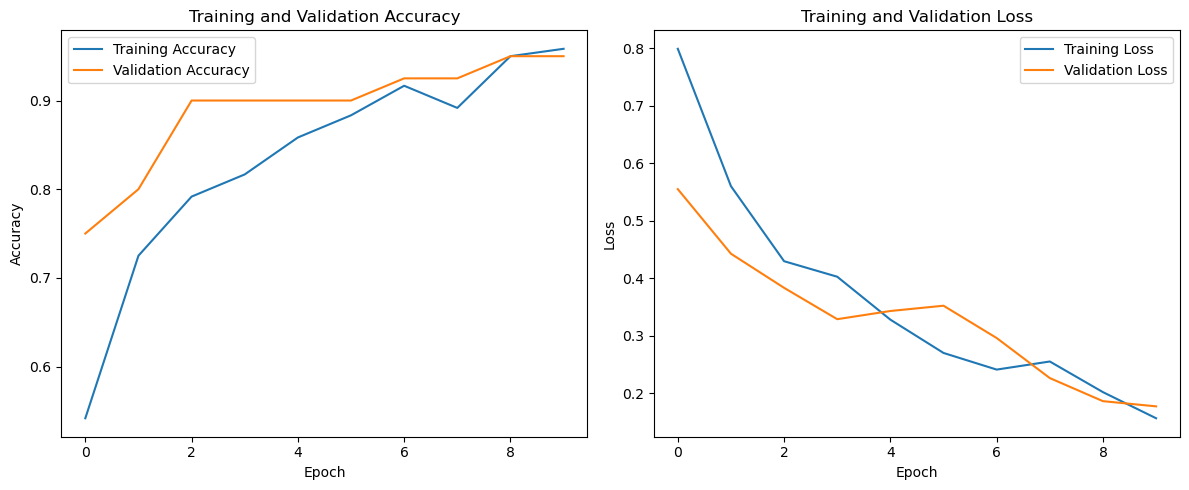

In [86]:
# Plotting the training history
plt.figure(figsize=(12, 5))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()